<a href="https://colab.research.google.com/github/Mayvei64/Piramida/blob/main/Piramida%20/ML_Lab%E2%84%963/Regression_by_Usynin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter
import pandas as pd

model - модель BMW

year - год регистрации

price - цена в фунтах стерлингов

transmission - тип коробки передач

mileage - пройденные мили

fuelType - тип топлива

tax - дорожный налог (фунты стерлингов)

mpg - миль на галлон

engineSize - объем двигателя в (л)


In [44]:
df = pd.read_csv('bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


# Проверим данные

In [45]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [46]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [47]:
def rename(name):
  for col in [name]:
    df[name] = df[name].replace(list(df[name].unique()), list(range(len(list(df[name].unique())))))

rename('transmission')
rename('model')
rename('fuelType')

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df)
df = pd.DataFrame(normalized_df, columns=df.columns)

Датасет чист и готов к работе!

In [49]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

## RMSE (Root Mean Squared Error):
Среднеквадратическая ошибка (RMSE) - это мера точности модели, представляющая собой квадратный корень из среднего квадрата ошибок. Чем ниже RMSE, тем лучше модель предсказывает значения.

## R2 (R-squared):
Коэффициент детерминации (R2) показывает, какая доля дисперсии зависимой переменной объясняется независимыми переменными в модели. Чем ближе R2 к 1, тем лучше модель объясняет данные.

## Adjusted R2:
Отрегулированный R2 учитывает количество независимых переменных в модели и количество наблюдений. Он корректирует R2, чтобы предотвратить чрезмерное приведение к высокому значению R2 путем добавления множества переменных в модель.

## Cross Validated R2:
Кросс-валидированный R2 (CV R2) рассчитывается путем разбивки данных на обучающий и тестовый наборы, оценки модели на обучающем наборе и последующей проверки её на тестовом наборе. Это дает более реалистичное представление о способности модели к обобщению на новые данные.

# Линейная регрессия

Линейная регрессия используется для предиктивного анализа. Линейная регрессия — это линейный подход к моделированию взаимосвязи между целевой переменной и множественными предикторами (независимыми переменными). Линейная регрессия фокусируется на условном распределении вероятностей ответа с учетом значений предикторов. При линейной регрессии существует опасность переобучения. Формула линейной регрессии выглядит следующим образом:

y = θx + b

где

θ – веса (параметры) модели

b – смещение.

In [50]:
# импорт нужных библиотек
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
import itertools
warnings.filterwarnings('ignore')

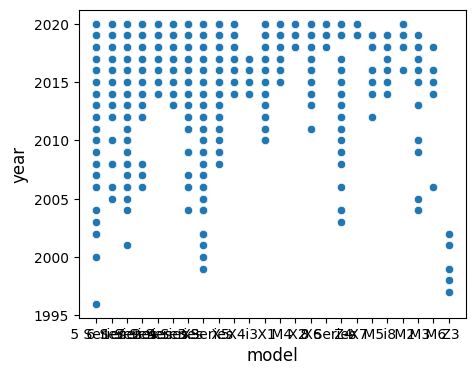

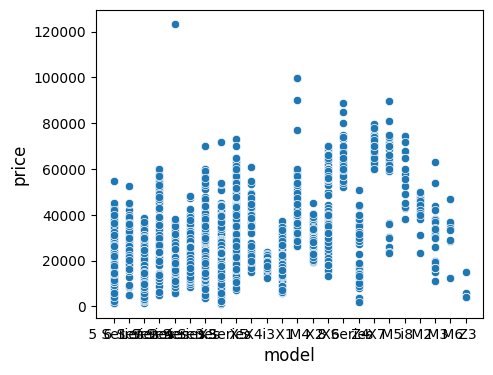

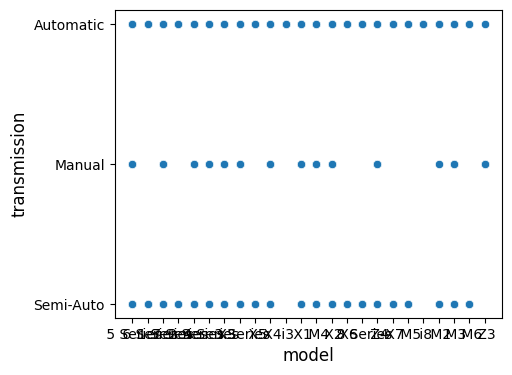

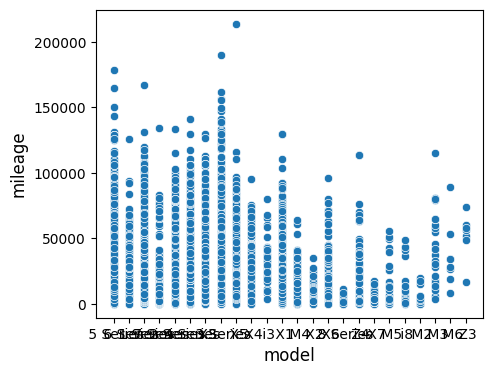

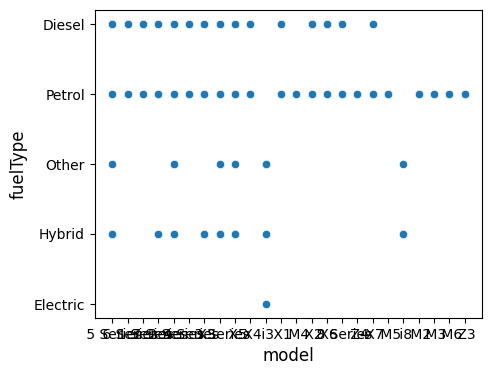

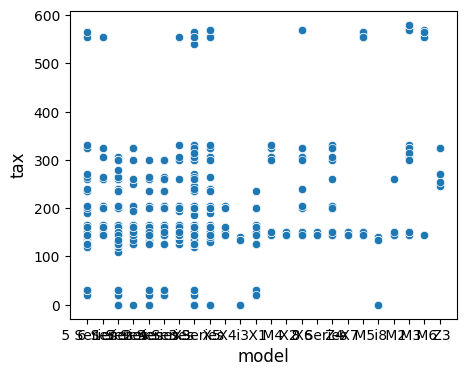

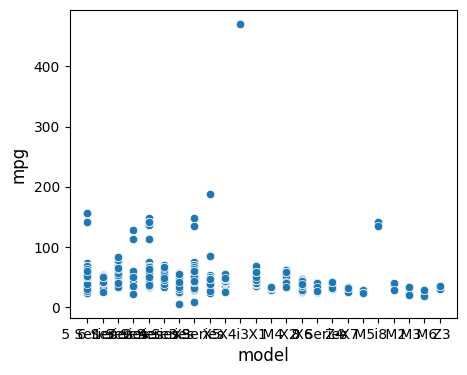

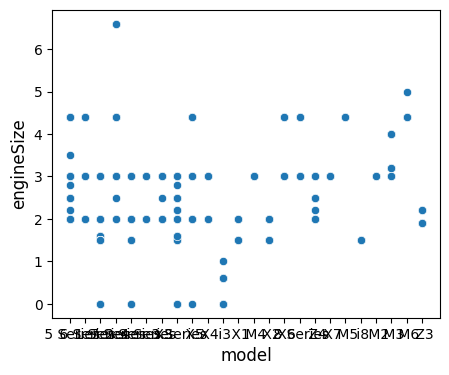

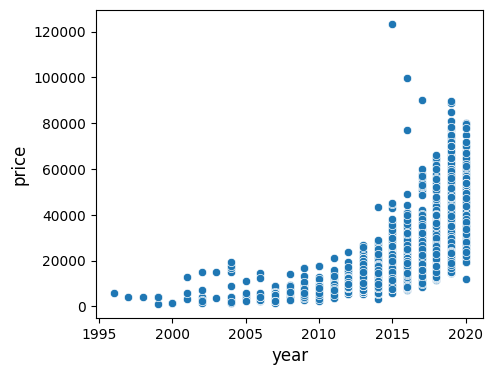

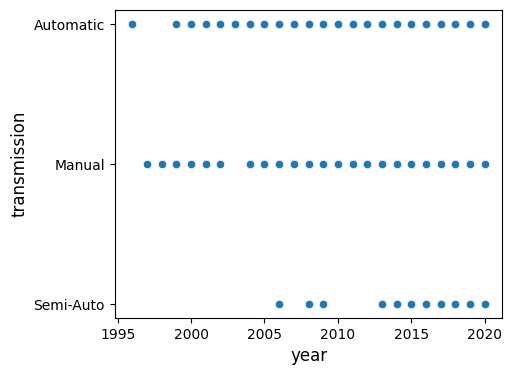

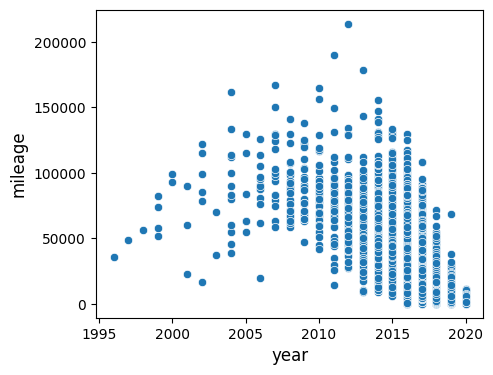

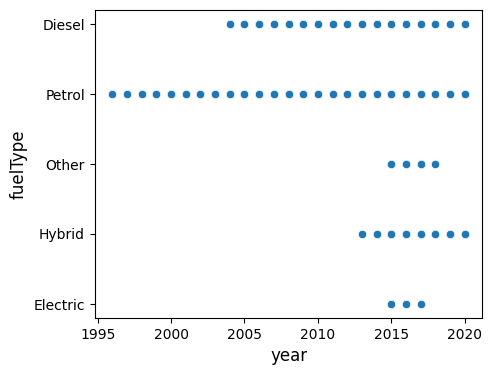

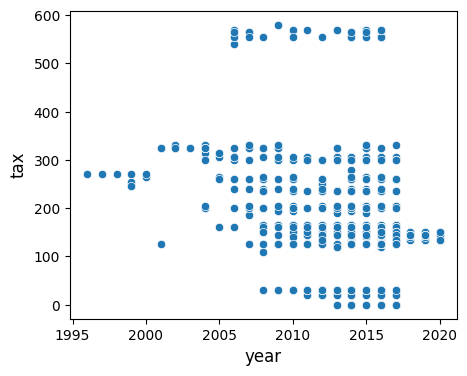

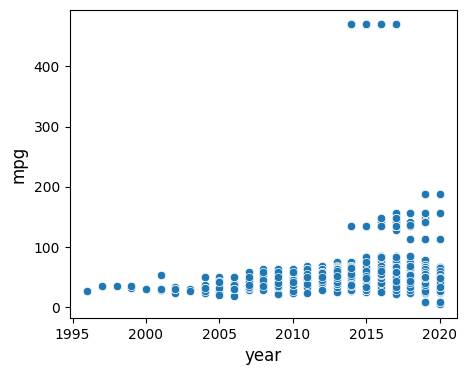

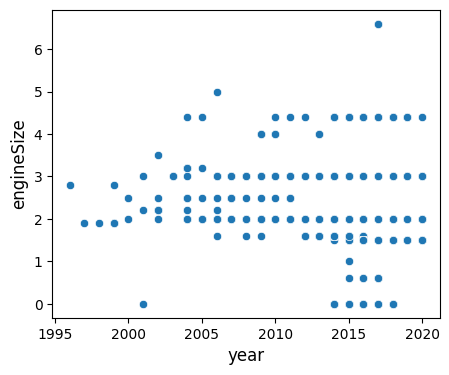

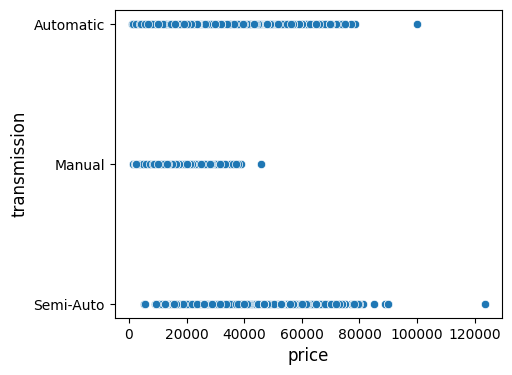

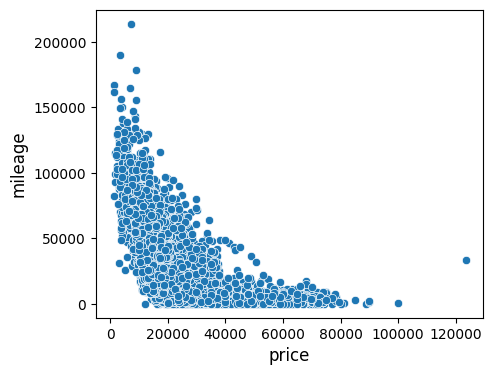

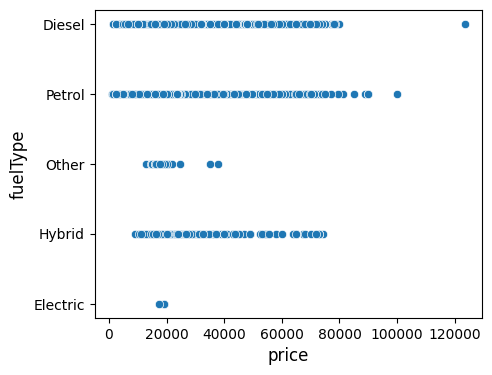

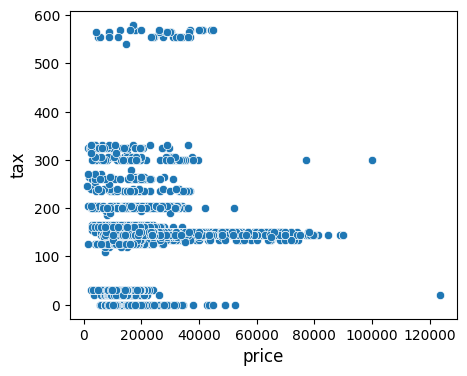

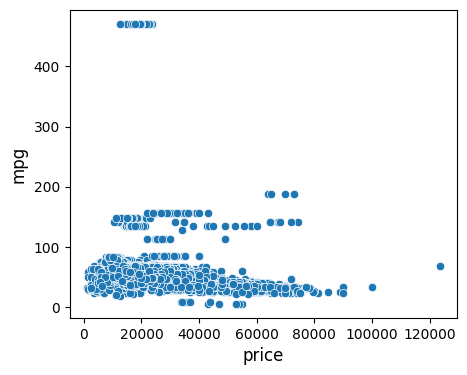

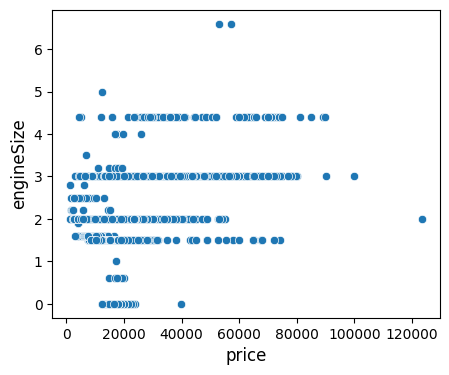

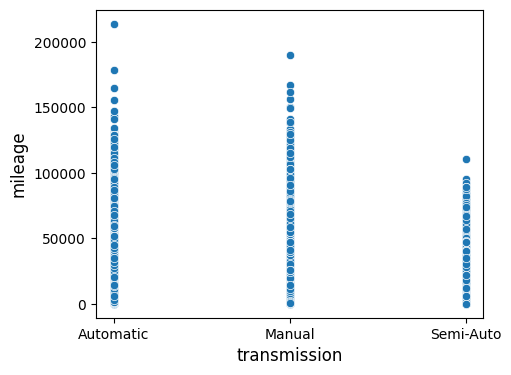

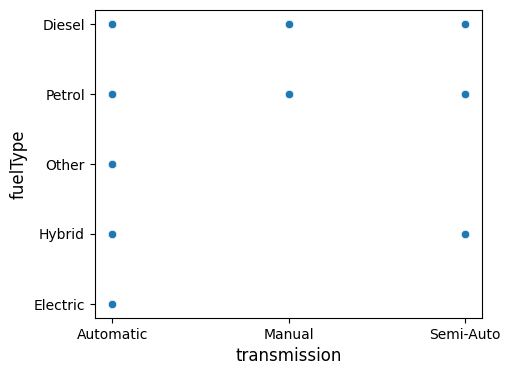

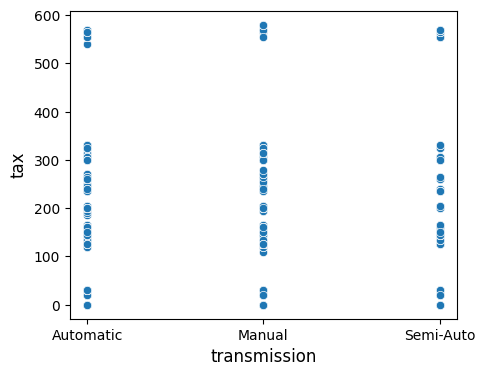

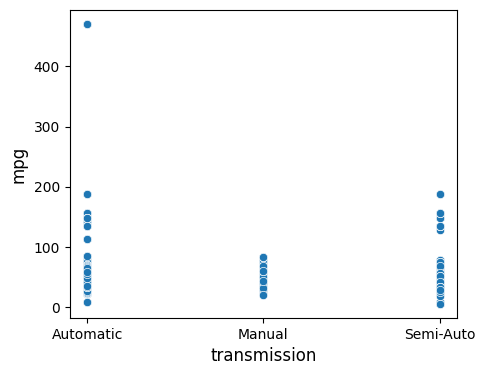

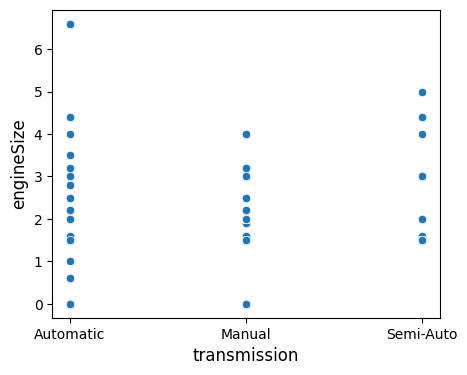

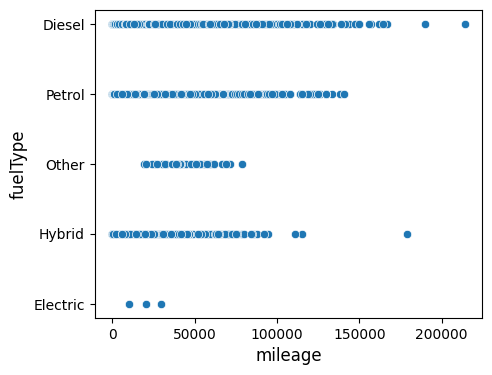

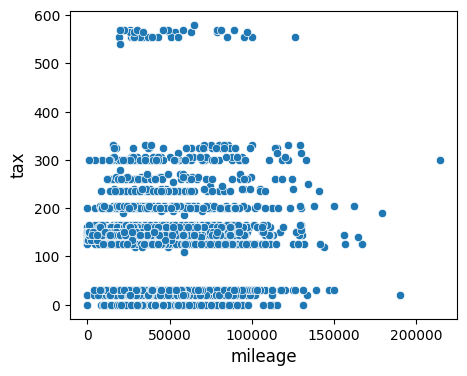

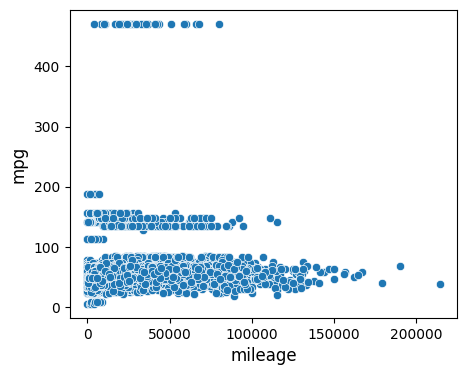

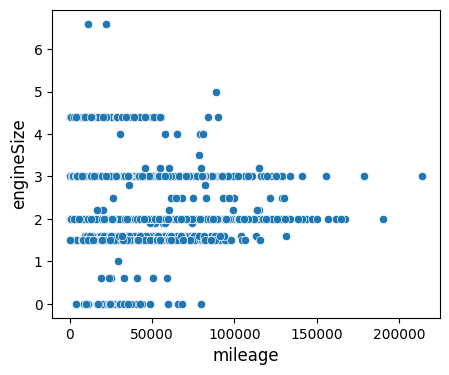

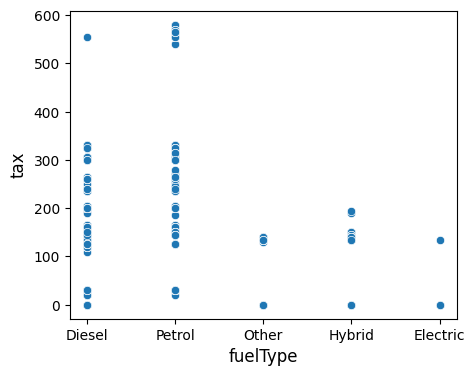

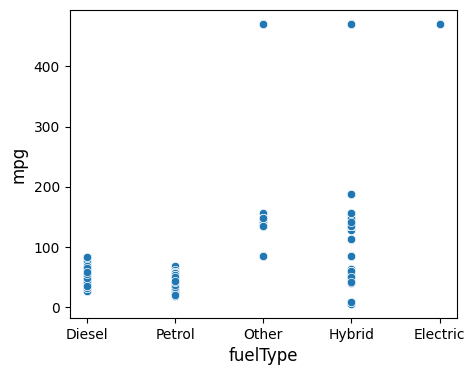

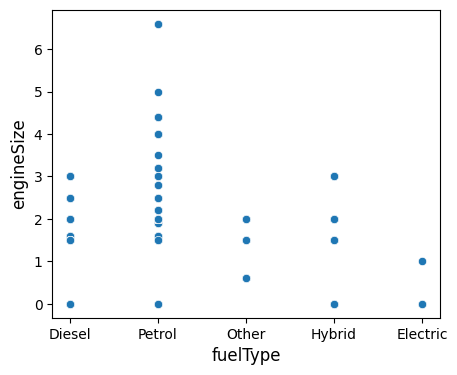

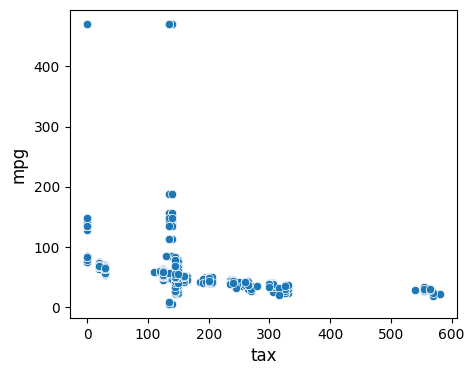

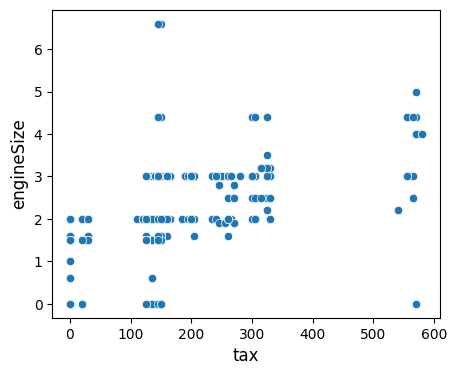

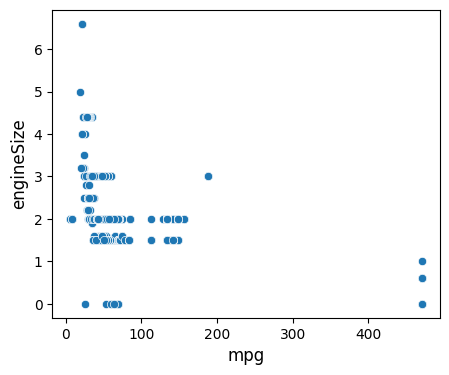

In [6]:
# нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной
for column_x, column_y in itertools.combinations(df.columns, 2):
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=column_x, y=column_y, data=df)
    plt.ylabel(column_y, size=12)
    plt.xlabel(column_x, size=12)
    plt.show()

In [51]:
# подготавливаем датасет к обучению

X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [52]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [53]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  0.0541
  R2: 0.6744
 Adjusted R2: 0.6732
 Cross Validated R2: 0.7068


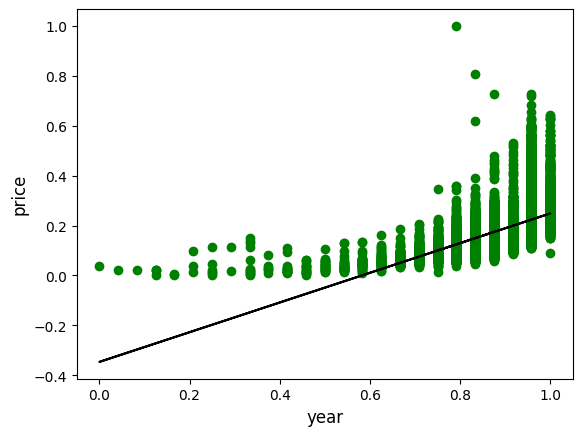

In [54]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = df['year'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['price'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('price', size=12)
plt.xlabel('year', size=12)
plt.show()


# Полиномиальная регрессия

Полиномиальная регрессия — это форма линейной регрессии, в которой связь между независимой переменной x и зависимой переменной y моделируется как полином n-й степени . Полиномиальная регрессия соответствует нелинейной связи между значением x и соответствующим условным средним значением y, обозначаемым E(y | x).

Общая форма уравнения полиномиальной регрессии степени n имеет вид:

y=β0+β1x+β2x2+…+βnxn+ϵ

где,

y — зависимая переменная. x — независимая переменная.  β0,β1,…,βn  — коэффициенты полиномиальных членов. n — степень многочлена.  ϵ  представляет собой ошибочный член.

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=30)

In [56]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  0.0388
  R2: 0.8294
 Adjusted R2: 0.827
 Cross Validated R2: 0.8233


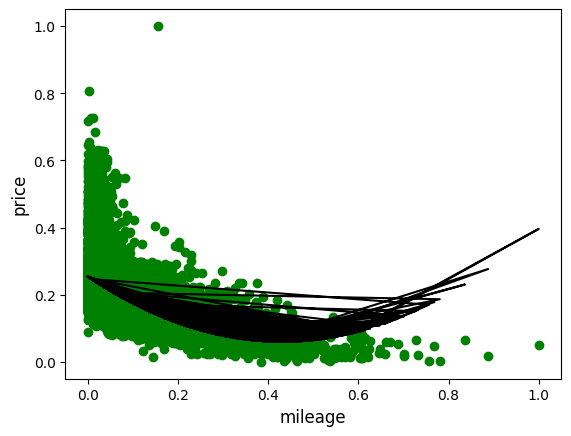

In [57]:
X2 = df['mileage'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['price'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('price', size=12)
plt.xlabel('mileage', size=12)
plt.show()


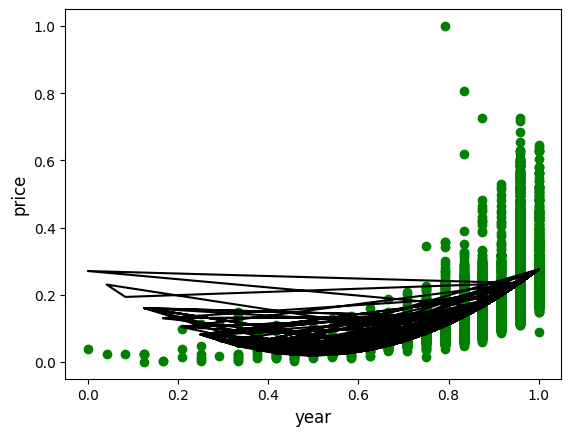

In [58]:
X2 = df['year'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['price'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('price', size=12)
plt.xlabel('year', size=12)
plt.show()


# Регрессия дерева принятия решений

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [60]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.0319
  R2: 0.8868
 Adjusted R2: 0.8863
 Cross Validated R2: 0.9261


# Регрессия случайного леса

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.0275
  R2: 0.916
 Adjusted R2: 0.9157
 Cross Validated R2: 0.9515


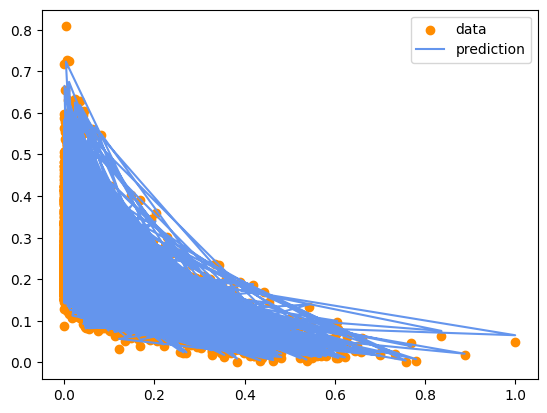

In [62]:
plt.scatter(X_train["mileage"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["mileage"], modelRF.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия опорных векторов (SVR) (не может загрузиться)

In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

In [12]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  11312.3697
  R2: 0.0488
 Adjusted R2: 0.0452
 Cross Validated R2: 0.0286


# Регрессия ElasticNet

In [13]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  6624.8467
  R2: 0.6738
 Adjusted R2: 0.6726
 Cross Validated R2: 0.7057


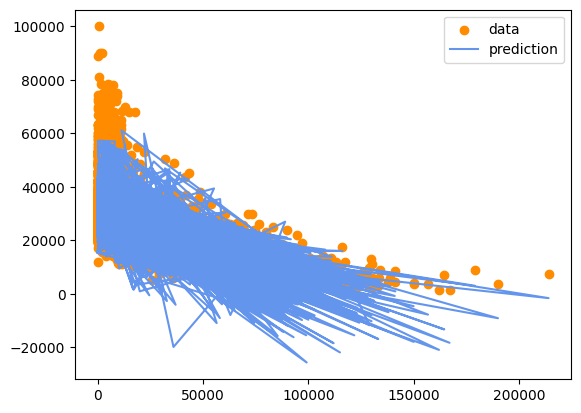

In [16]:
plt.scatter(X_train["mileage"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["mileage"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()